# Project 1                                    AIR QUALITY PREDICTION

## Preprocessing 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
air_quality=pd.read_excel('AirQualityUCI.xlsx')

In [28]:
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [29]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [30]:
air_quality.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [31]:
air_quality.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [32]:
dict(air_quality.dtypes)

{'Date': dtype('<M8[ns]'),
 'Time': dtype('O'),
 'CO(GT)': dtype('float64'),
 'PT08.S1(CO)': dtype('float64'),
 'NMHC(GT)': dtype('int64'),
 'C6H6(GT)': dtype('float64'),
 'PT08.S2(NMHC)': dtype('float64'),
 'NOx(GT)': dtype('float64'),
 'PT08.S3(NOx)': dtype('float64'),
 'NO2(GT)': dtype('float64'),
 'PT08.S4(NO2)': dtype('float64'),
 'PT08.S5(O3)': dtype('float64'),
 'T': dtype('float64'),
 'RH': dtype('float64'),
 'AH': dtype('float64')}

In [33]:
#divide numeric and categorical variables
numeric_var_names = [key for key in dict(air_quality.dtypes) if dict(air_quality.dtypes)[key] in ['int32','int64','float32','float64']]
cat_var_names = [key for key in dict(air_quality.dtypes) if dict(air_quality.dtypes)[key] in ['object','O','<M8[ns]']]

In [34]:
numeric_var_names

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [35]:
air_quality_num = air_quality[numeric_var_names]
air_quality_num

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [36]:
#create data audit report

def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.var(),x.std(),x.mean(),x.median(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
              x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),
              x.dropna().quantile(0.95),x.dropna().quantile(0.99)],index=['N','NMISS','SUM','VAR','STD','MEAN','MEDIAN','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99'])
num_summary = air_quality_num.apply(lambda x : var_summary(x)).T

In [37]:
num_summary

,N,NMISS,SUM,VAR,STD,MEAN,MEDIAN,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99
CO(GT),9357.0,0.0,-3.200798e+05,6030.636106,77.657170,-34.207524,1.500000,-200.0,-200.0,-200.000000,-200.000000,0.600000,1.500000,2.600000,3.900000,4.700000,6.600000
PT08.S1(CO),9357.0,0.0,9.814273e+06,108779.263095,329.817015,1048.869652,1052.500000,-200.0,-200.0,745.700000,823.500000,921.000000,1052.500000,1221.250000,1406.600000,1501.550000,1703.720000
NMHC(GT),9357.0,0.0,-1.488606e+06,19540.990493,139.789093,-159.090093,-200.000000,-200.0,-200.0,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,144.200000,523.000000
C6H6(GT),9357.0,0.0,1.745619e+04,1712.317143,41.380154,1.865576,7.886653,-200.0,-200.0,0.736225,1.960503,4.004958,7.886653,13.636091,20.083956,24.432425,33.984869
PT08.S2(NMHC),9357.0,0.0,8.369612e+06,117180.176653,342.315902,894.475963,894.500000,-200.0,-200.0,470.950000,581.150000,711.000000,894.500000,1104.750000,1298.750000,1414.650000,1641.800000
NOx(GT),9357.0,0.0,1.577630e+06,66267.404793,257.424561,168.604200,141.000000,-200.0,-200.0,-200.000000,-200.000000,50.000000,141.000000,284.200000,497.460000,652.960000,970.904000
PT08.S3(NOx),9357.0,0.0,7.437620e+06,103669.208719,321.977031,794.872333,794.250000,-200.0,-200.0,409.950000,498.000000,637.000000,794.250000,960.250000,1146.700000,1281.100000,1651.380000
NO2(GT),9357.0,0.0,5.439776e+05,16111.587462,126.931428,58.135898,96.000000,-200.0,-200.0,-200.000000,-200.000000,53.000000,96.000000,133.000000,171.000000,194.000000,240.820000
PT08.S4(NO2),9357.0,0.0,1.301899e+07,218268.721729,467.192382,1391.363266,1445.500000,-200.0,-200.0,757.100000,912.150000,1184.750000,1445.500000,1662.000000,1886.100000,2020.300000,2349.590000
PT08.S5(O3),9357.0,0.0,9.122622e+06,208778.379165,456.922728,974.951534,942.000000,-200.0,-200.0,347.750000,483.000000,699.750000,942.000000,1255.250000,1577.000000,1749.650000,2086.000000


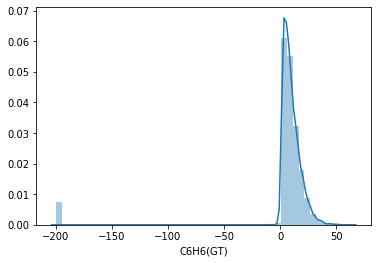

In [38]:
import seaborn as sns
sns.distplot(air_quality_num['C6H6(GT)'])

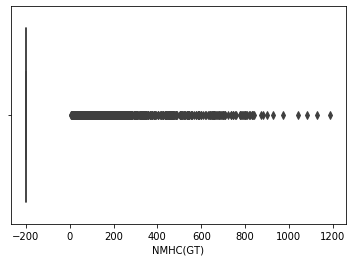

In [39]:
sns.boxplot(air_quality_num['NMHC(GT)'])

In [40]:
air_quality = air_quality_num
air_quality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


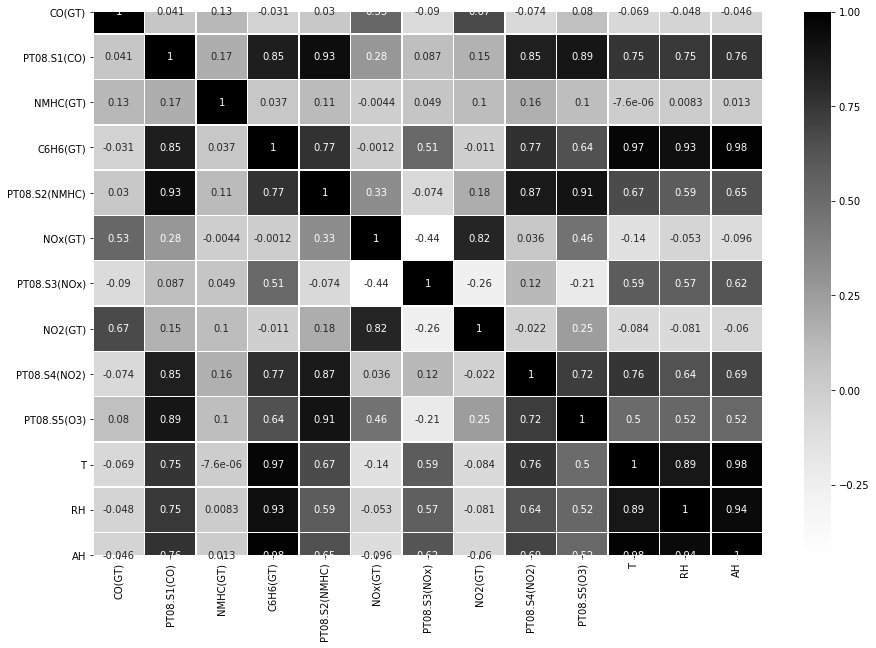

In [41]:

sns.heatmap(air_quality.corr(),cmap='Greys',annot=True,linewidth=0.5)
plt.gcf().set_size_inches(15,10)
plt.show()

## Visualization 

In [42]:
air_quality.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

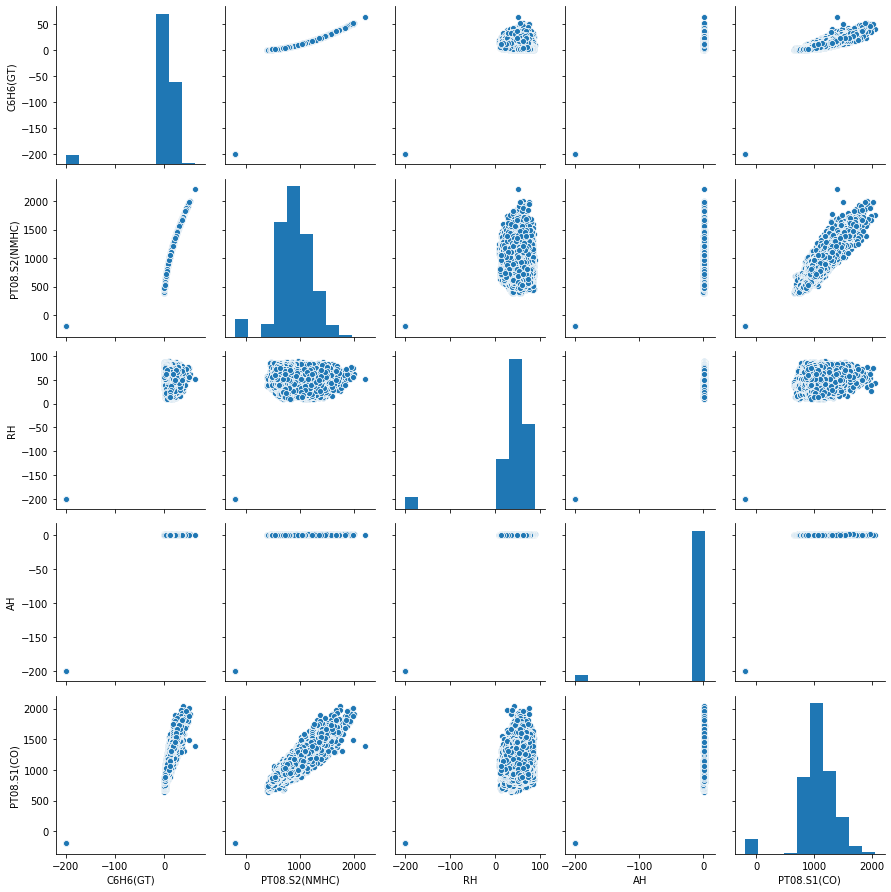

In [43]:
cols=['C6H6(GT)', 'PT08.S2(NMHC)' , 'RH', 'AH', 'PT08.S1(CO)']
col_sets=pd.DataFrame(air_quality[cols])
sns.pairplot(col_sets)
plt.tight_layout()
plt.show()

## Model Building

In [44]:
air_quality.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [45]:
feature_columns = air_quality.columns.difference(['C6H6(GT)'])
feature_columns

Index(['AH', 'CO(GT)', 'NMHC(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH',
       'T'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,test_y = train_test_split(air_quality[feature_columns], air_quality['C6H6(GT)'],test_size=0.2)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7485, 12)
(7485,)
(1872, 12)
(1872,)


# LINEAR REGRESSION

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
lr.fit(train_x, train_y)

#print("Training Complete")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print('Intercept c: ' + str(lr.intercept_))
print('Coefficient m: '+ str(lr.coef_))

Intercept c: -21.51825221238097
Coefficient m: [ 9.91610653e-01 -3.12245747e-04 -1.37308943e-03 -4.25754880e-03
  2.76852886e-03  2.26197418e-03  2.76582998e-02  3.99164258e-03
  1.43958700e-03 -5.06557825e-04 -2.69782157e-02 -1.03844600e-01]


In [50]:
#y = mx + c
line = lr.coef_ * air_quality[feature_columns] + lr.intercept_

In [51]:
predict = lr.predict(test_x)
predict

array([  18.66417729,    5.12441785,    4.07235401, ...,   14.71859202,
       -200.30656429, -199.68981934])

In [52]:
test_y

7432     17.652409
8480      5.323602
9256      4.917202
4996      8.908666
8550      2.173136
           ...    
3483      9.896737
612       6.209934
1731     13.804146
8083   -200.000000
7156   -200.000000
Name: C6H6(GT), Length: 1872, dtype: float64

In [53]:
list_tuples = list(zip(predict, test_y))

dff = pd.DataFrame(list_tuples, columns = ["Predicted", "Actual"])
dff
#pd.DataFrame(["Predicted"] : predict, ["Actual"] : test_y )

,Predicted,Actual
0,18.664177,17.652409
1,5.124418,5.323602
2,4.072354,4.917202
3,9.517759,8.908666
4,1.763140,2.173136
...,...,...
1867,10.346416,9.896737
1868,7.764819,6.209934
1869,14.718592,13.804146
1870,-200.306564,-200.000000


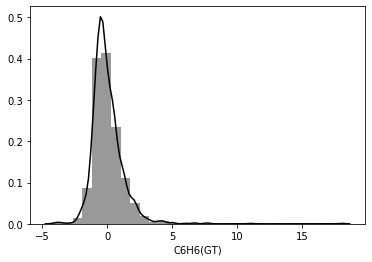

In [54]:
sns.distplot((test_y - predict), hist = True, color = 'black', bins = 30)

# Accuracy of the model

In [57]:
from sklearn.metrics import r2_score
r2_score(test_y,lr.predict(test_x))

0.9991210717431768